<a href="https://colab.research.google.com/github/anoopo/PythonBootCamp/blob/master/BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Assignment - Linear Regression**
     - Anoop O

**Assignment:**

We are a consulting company who is tasked to understand the demand for shared bikes in USA market based on different features.

The US based bike sharing company called Bloom Bikes allows the users to borrow bikes from a "dock" and return to another "dock" on rental basis and is computer controlled. As part of their business strategy, the company wants to know:

1. Which variables are significant in predicting the  demand for shared bikes.
2. How well those variables describe the bike demands

**Business Goal:**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

**Model Building**

We will analyse the data given by the company and will be building linear regression models which will help us identify the predictors that influences the bike rental patterns.

As part pf this assignment, we will be following these steps:

1. Import the required libraries - for data analysis and modeling
2. Exploratry data analysis on the data set  - includes the data cleaning and data transformation as requied
3. Preparing the data for modeling - data to train the model and a set to test the model
4. Model building - Multiple models will be prepared and the best one will finally be selected
5. Analysis on the predicted values and assessing the models

## Import the required libraries

In [1]:
# Import the libraries required for data analysis and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
#Import the libraries for the data modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading the Data

In [3]:
bb = pd.read_csv('day.csv')
bb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bb.shape

(730, 16)

In [5]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bb.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



## Data Cleaning

#### Null values

In [7]:
bb.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0




> The info output above indicated there is no column with null values. No action is required on this





#### Duplicate Entries

In [8]:
print('Duplicate entries: ',bb.duplicated().sum())

Duplicate entries:  0


No duplicates present in the data frame

#### Drop the unnecessary columns



```
We will drop the columns that are not irrelevant for the analsys. From the list of the columns, following can be dropped:
  - Instant -> This just shows the index and is not required
  - casual, registered -> Our target is to identify the total demand of the bike rentals. The sum of these columns are aleady counted in the 'cnt' column. Hence we will use that column and drop these two
```




In [9]:
bb.drop(['instant','casual','registered'],axis=1, inplace=True)
bb.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Feature Conversion

> From the data dictionary, we could see that a few of the columns are of integer type, but they really indicate a category. It would be good to convert to categorical strings for easy plotting and later to create dummy variables as required while creating the model


##### Identifying the day for the mapping the weekday column to categorical strings



> We will use the pandas datetime feature to identify the day of the week corresponding to the date and then update "Weekday" column with the string values. This will make it a categorical string



In [10]:
bb['dteday'] = pd.to_datetime(bb['dteday'],format="%d-%m-%Y")
bb['weekday'] = bb['dteday'].dt.day_name()

#####  Mapping of the categorical columns to strings

In [11]:
## Map seasons as per the data dictionary - season (1:spring, 2:summer, 3:fall, 4:winter)


bb['season'] = bb['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
## Map weathersit as per the data dictionary:
## 	+ weathersit :
##		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


bb['weathersit'] = bb['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light SnoRain', 4:'Heavy Rain'})

In [13]:
## we will now convert the integer value of mnth to a string name
import calendar
bb['mnth'] = bb['mnth'].apply(lambda x: calendar.month_abbr[x])

In [14]:
## We will drop the column dteday now since we have the information about Year and Month on separate cokumns
bb.drop('dteday',axis=1,inplace=True)

In [15]:
bb.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## Visualizing the data




> Now that the data is cleaned, we will do plot some graphs and do a bit of analysis before we build the model. This might give us some insights into the predictor *variables*



In [16]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


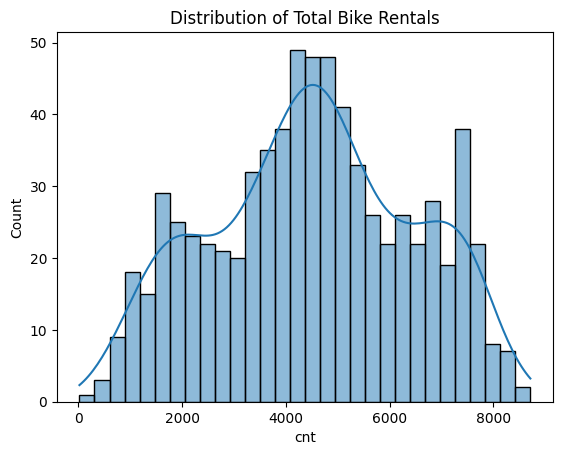

In [17]:
## Trying to understand the distribution of the cnt
sns.histplot(bb['cnt'], kde=True, bins=30)
plt.title("Distribution of Total Bike Rentals")
plt.show()


> The bike rental distribution looks normal and not skewed.


> We will plot the other numerical variables to see if there is any outlier

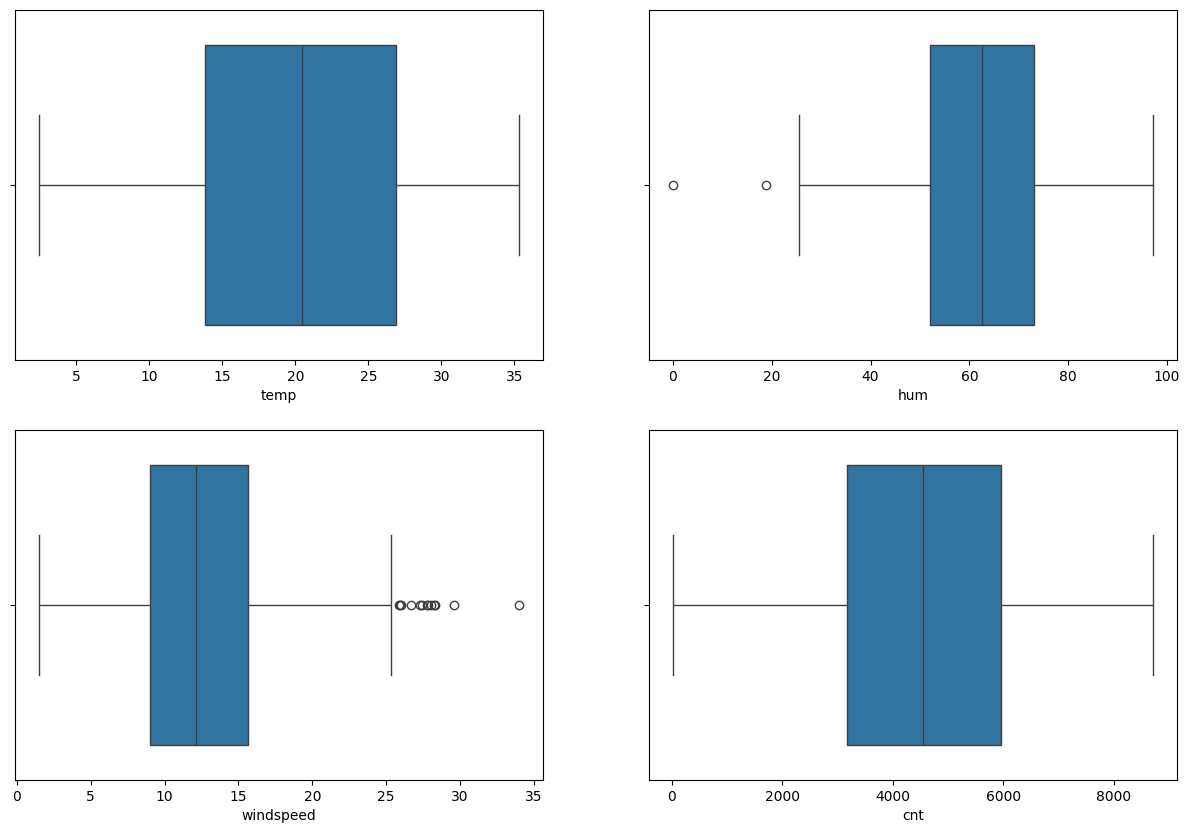

In [18]:
## Box plot for other numerical variables
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(x='temp', data=bb, ax=ax[0,0])
sns.boxplot(x='hum', data=bb, ax=ax[0,1])
sns.boxplot(x='windspeed', data=bb, ax=ax[1,0])
sns.boxplot(x='cnt', data=bb, ax=ax[1,1])
plt.show()



> There is an outlier in the 'hum' column where the value is 0. This is impossible in georgraphy and hence we should consider either dropping this row or imputing with the mean value for the month



In [19]:
## Entry with hum =0.
hum_0_month = bb[bb['hum']==0]['mnth'].iloc[0]
hum_0_month

'Mar'

In [20]:
## Mean humidity for Mar
mean_humidity =round(bb[bb['mnth']==hum_0_month]['hum'].mean(),1)
mean_humidity

58.8

In [21]:
## Update the humidity of index 68 with value as above

bb.at[68,'hum'] = mean_humidity

In [22]:
bb[bb['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


#### Categorical variable analysis

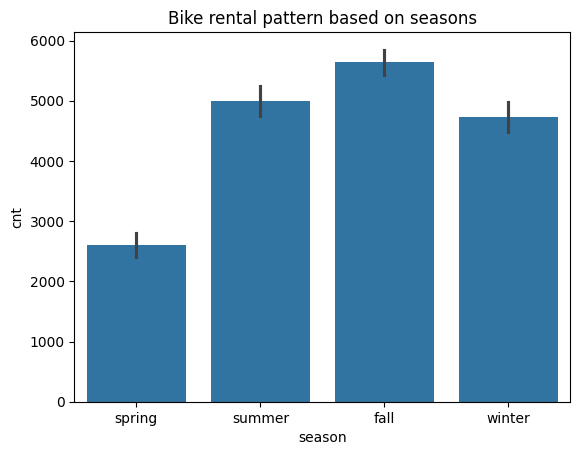

In [23]:
## Bike rental pattern based on seasons
sns.barplot(x='season',y='cnt',data=bb)
plt.title('Bike rental pattern based on seasons')
plt.show()




> Bike rentals are high on fall and then on summer. This could act as a predictor feature in the model



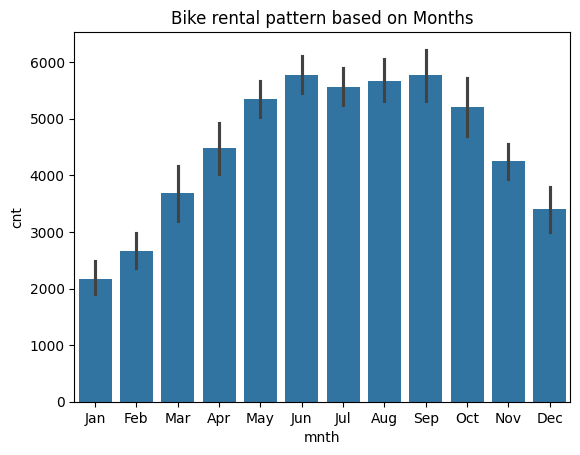

In [24]:
## Bike rental pattern based on Months
sns.barplot(x='mnth',y='cnt',data=bb)
plt.title('Bike rental pattern based on Months')
plt.show()



> As seen with the seasons, we can see that the rentals go up from April when the summer starts and goes high through the fall



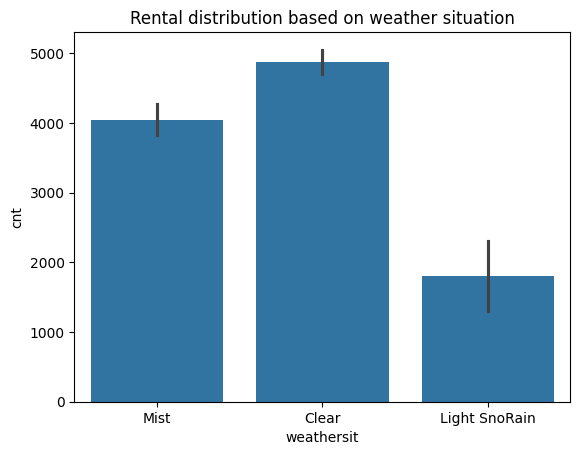

In [25]:
## Rental distribution based on weather situation
sns.barplot(x='weathersit',y='cnt',data=bb)
plt.title('Rental distribution based on weather situation')
plt.show()



> As expected there is a higher count of bike rentals on a clear day. This could be a predictor for the model. Also we dont see any value on the fourth category of the weathersit which is "Heavy Rain". Lets check this



In [26]:
bb['weathersit'].unique()

array(['Mist', 'Clear', 'Light SnoRain'], dtype=object)



> As we can see, there is no entry for "Heavy Rain". The dummy variables created for the model will be impacted accordingly



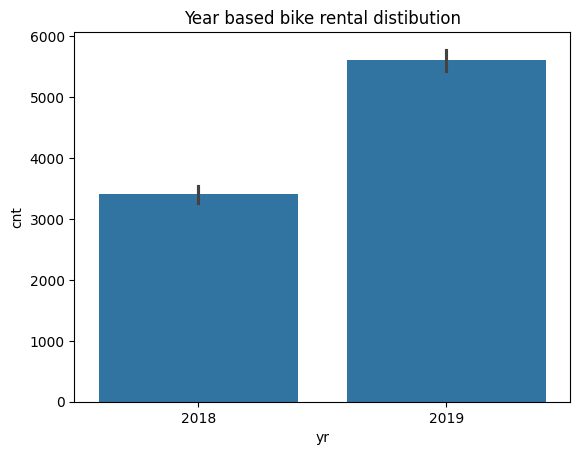

In [27]:
## Year based bike rental distibution
yearplot = sns.barplot(x='yr',y='cnt',data=bb)
yearplot.set_xticklabels(['2018','2019'])
plt.title('Year based bike rental distibution')
plt.show()



> The bike rental pattern shows an increase from 2018, 2019. However, we will do tha analysis again based on the model output before we conclude on the influence of this variable on cnt



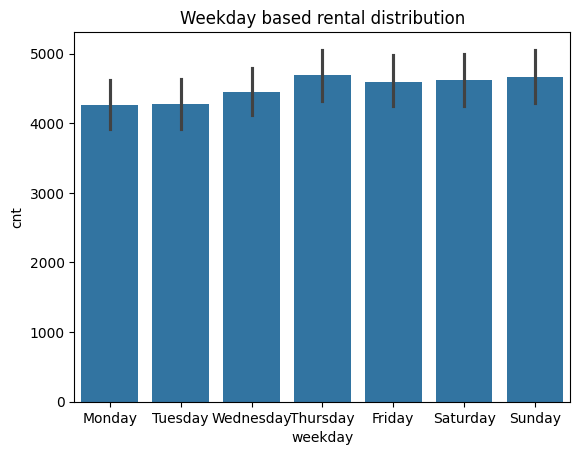

In [28]:
## Weekday based rental distribution
sns.barplot(x='weekday',y='cnt',data=bb)
plt.title('Weekday based rental distribution')
plt.show()




> Bike rentals are almost uniform throughout the week with no specific spike on weekdays or weekends. Hence not creating derived variables based on this



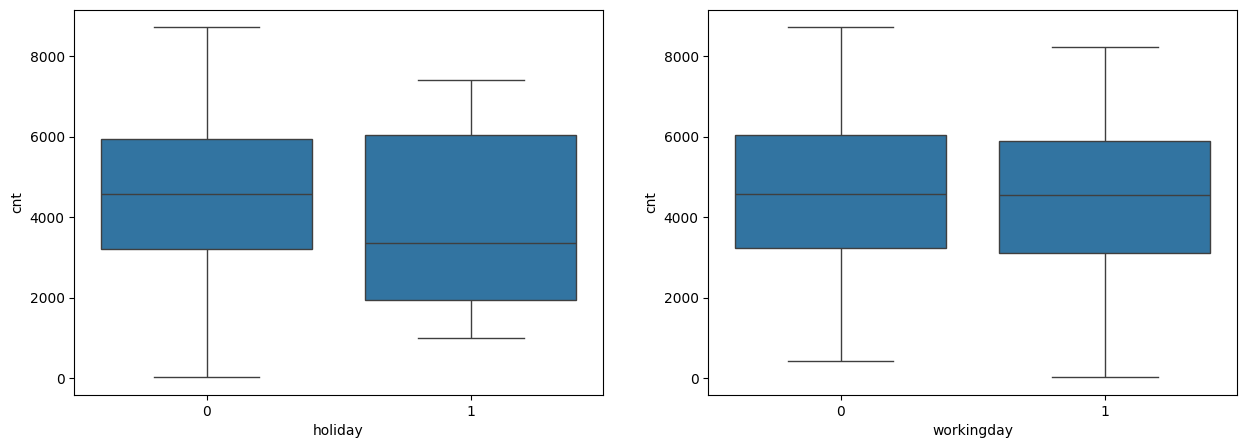

In [29]:
## Box plot for holiday and working day against count
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='holiday',y='cnt',data=bb, ax=ax[0])
sns.boxplot(x='workingday',y='cnt',data=bb, ax=ax[1])
plt.show()



> Holidays and Working days seems to have almost same impact on the bike rentals with the day being a holiday shows a lower count.



#### Continous variable analysis



> Lets check the relation of the numerical variables like temp, atemp, humidity and windspeed on cnt



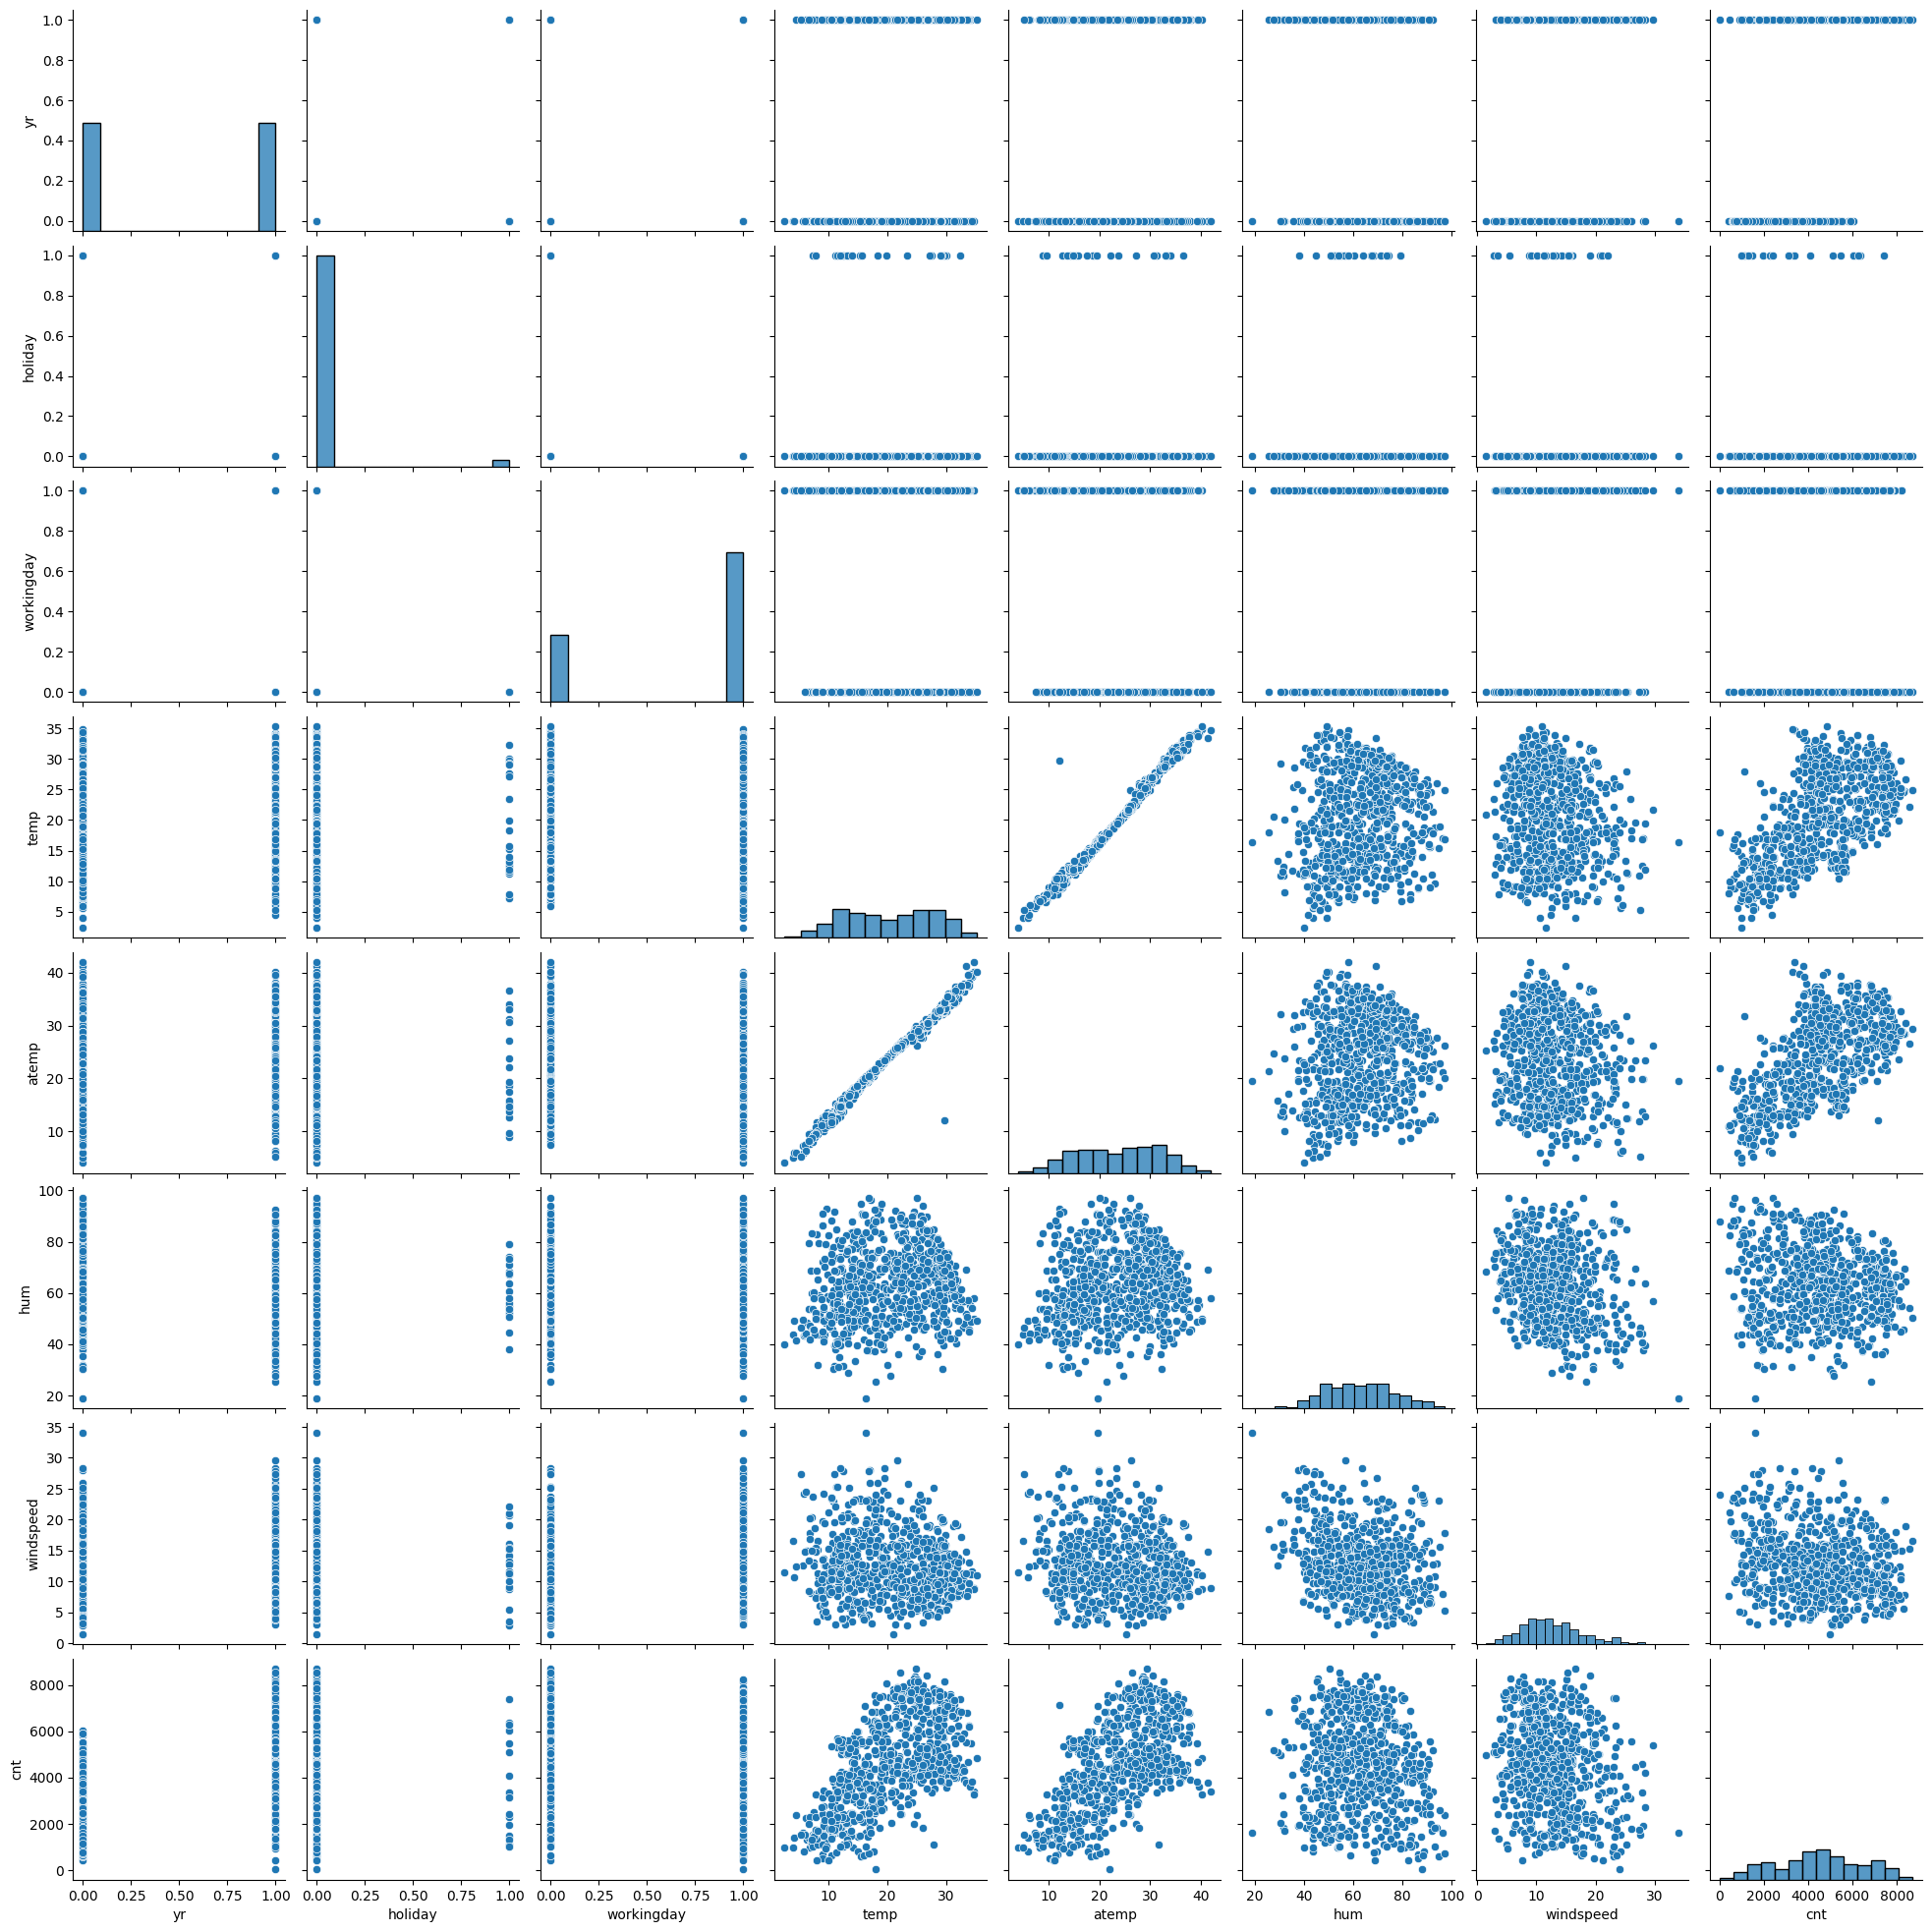

In [30]:
sns.pairplot(bb)
plt.show()



> From the above pairplot, we can see some positive correlation between the independent variables like temp, atemp and months with the dependent variable which is "cnt". So it is good to consider a linear regression model for the numeric variables





> Also from the above plot, it looks like there are some correlation between some of the independent variables as well. Lets plot a heatmap and confirm this



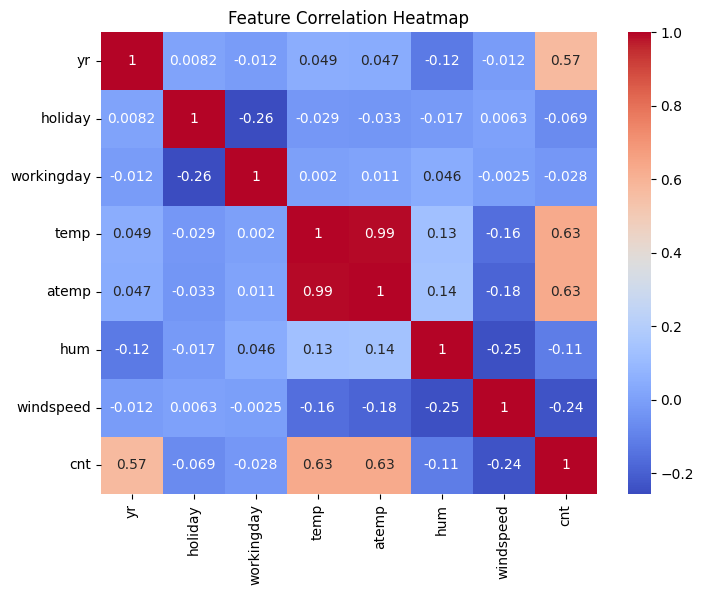

In [31]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(bb.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



> Since there is a high correlation between temp and atemp, it might result in multicollinearity in the model. Hence it is good to drop one of these. Since the temp is the recorded value, we will keep this and drop the "atemp" which is a derived feature



In [32]:
# drop atemp from the dataframe
bb.drop('atemp',axis=1,inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


## Preparing the date for modelling

In [33]:
bb.shape

(730, 11)

In [34]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Creating dummy variables

In [35]:
# Dummy variable creatio on the categorical columns
# We will create dummy variables for:
# - season
# - mnth
# - weekday
# - weathersit
bb = pd.get_dummies(bb, columns=['season','mnth','weekday'], drop_first=True, dtype=int)
bb = pd.get_dummies(bb, columns=['weathersit'], dtype=int)
bb.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light SnoRain,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
bb.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Clear',
       'weathersit_Light SnoRain', 'weathersit_Mist'],
      dtype='object')

#### Split the data to training and test sets

In [37]:
# Train and test data frames
bb_train, bb_test = train_test_split(bb, train_size=0.7, random_state=42)

In [38]:
bb_train.shape

(510, 30)

In [39]:
bb_test.shape

(220, 30)

In [40]:
bb.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light SnoRain,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Rescaling the features



> We will rescale the numeric variables in the dataframe using minmax scaler.
This will be applied on the columns - 'temp', 'hum'. 'windspeed', 'cnt'



In [41]:
num_var = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()


bb_train[num_var] = scaler.fit_transform(bb_train[num_var])
bb_test[num_var] = scaler.transform(bb_test[num_var])


In [42]:
bb_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light SnoRain,weathersit_Mist
645,1,1,0,0.403972,0.635834,0.419004,0.609320,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.335659,0.708724,0.554026,0,1,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.709714,0.415925,0.088253,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.753345,0.110593,0.862127,0,0,1,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,0.703024,0.863292,0.839562,0.439696,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [43]:
bb_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light SnoRain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.698039,0.551313,0.533104,0.415045,0.497429,0.231373,0.258824,0.24902,...,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.625490,0.029412,0.345098
std,0.500106,0.163554,0.459559,0.227237,0.190825,0.185760,0.234207,0.422124,0.438419,0.43287,...,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.384816,0.281934,0.344772,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.540430,0.384737,0.501871,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.670738,0.526489,0.677080,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




> We can see above the values have been rescaled for all the variables. Now lets proceed with training the models



## Model creation

#### Heatmap to understand the correation



> We will start with identifying the correlation between different independent variables of the data set with the dependent variable "cnt"



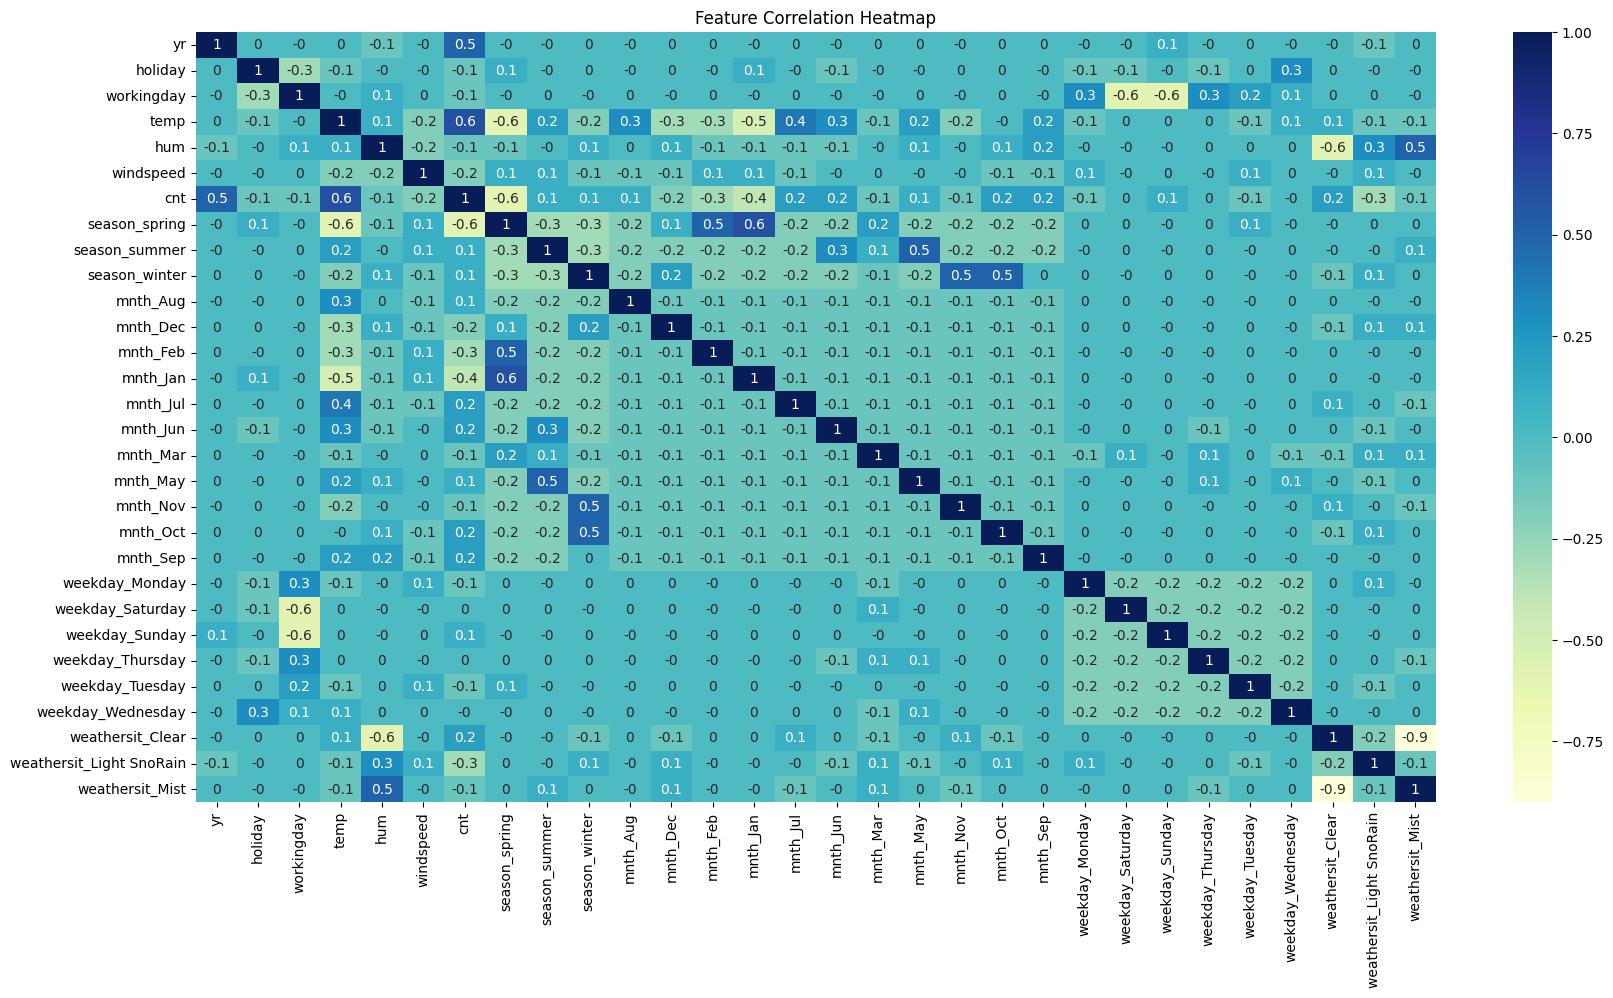

In [44]:
## Heat map on the trained data
plt.figure(figsize=(20,10))
sns.heatmap(round(bb_train.corr(),1),annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()



> There is no high correlation between any variable and the cnt. Hence we will build the regression model and analyse the impact of multiple variables on the cnt




> Before we go with multiple variables, lets build a base model with all the independent variables against the cnt and see how the results are. This is just for the starting and we will be moving to RFE since it is clear that analysing these one by one will be hectic



#### Creating the X train and Y train variables



> We will represent the independent variables (factors that affects the bike rentals) as "X" and the dependent variable (count) as "y".



In [45]:
y_train = bb_train['cnt']
X_train = bb_train.drop('cnt',axis=1)

In [46]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light SnoRain,weathersit_Mist
645,1,1,0,0.403972,0.635834,0.419004,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.335659,0.708724,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.709714,0.415925,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.753345,0.110593,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,0.703024,0.863292,0.839562,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [47]:
y_train.head()

,cnt
645,0.609320
163,0.554026
360,0.088253
640,0.862127
625,0.439696


#### Sample Model


> This step doesnt have much of a significance. This is added to get an initial overview of the various factors for the model building. In the following example, we are picking all the "X" variables irrespective of their significance.



In [48]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [49]:
lr_model.params

,0
const,0.150118
yr,0.234685
holiday,-0.067362
workingday,0.001191
temp,0.450612
hum,-0.132888
windspeed,-0.123866
season_spring,-0.145381
season_summer,0.012106
season_winter,0.075696


In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.88
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.25e-176
Time:                        06:07:34   Log-Likelihood:                 495.34
No. Observations:                 510   AIC:                            -932.7
Df Residuals:                     481   BIC:                            -809.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1501      0.085      1.771      0.077      -0.016       0.317
yr                           0.2347      0.009     27.203      0.000       0.218       0.252
holiday                     -0.0674      0.097     -0.698      0.486      -0.257       0.122
workingday                   0.0012      0.101      0.012      0.991      -0.197       0.199
temp                         0.4506      0.049      9.143      0.000       0.354       0.547
hum                         -0.1329      0.033     -4.081      0.000      -0.197      -0.069
windspeed                   -0.1239      0.025     -4.880      0.000      -0.174      -0.074
season_spring               -0.1454      0.033     -4.442      0.000      -0.210      -0.081
season_summer                0.0121      0.027      0.443      0.658      -0.042       0.066
season_winter                0.0757      0.028      2.728      0.007       0.021       0.130
mnth_Aug                    -0.0130      0.036     -0.360      0.719      -0.084       0.058
mnth_Dec                    -0.0369      0.037     -1.007      0.315      -0.109       0.035
mnth_Feb                     0.0136      0.037      0.364      0.716      -0.060       0.087
mnth_Jan                     0.0002      0.038      0.004      0.997      -0.074       0.075
mnth_Jul                    -0.0474      0.036     -1.299      0.195      -0.119       0.024
mnth_Jun                    -0.0028      0.026     -0.108      0.914      -0.053       0.048
mnth_Mar                     0.0532      0.029      1.818      0.070      -0.004       0.111
mnth_May                     0.0304      0.021      1.416      0.157      -0.012       0.073
mnth_Nov                    -0.0500      0.039     -1.288      0.199      -0.126       0.026
mnth_Oct                     0.0408      0.038      1.071      0.285      -0.034       0.116
mnth_Sep                     0.0720      0.033      2.153      0.032       0.006       0.138
weekday_Monday              -0.0292      0.016     -1.876      0.061      -0.060       0.001
weekday_Saturday             0.0064      0.102      0.063      0.950      -0.194       0.206
weekday_Sunday               0.0132      0.101      0.131      0.896      -0.184       0.211
weekday_Thursday             0.0013      0.016      0.085      0.932      -0.030       0.032
weekday_Tuesday             -0.0189      0.015     -1.225      0.221      -0.049       0.011
weekday_Wednesday           -0.0199      0.016     -1.219      0.223      -0.052       0.012
weathersit_Clear             0.1404      0.030      4.727      0.000       0.082       0.199
weathersit_Light SnoRain    -0.0738      0.035     -2.100      0.036      -0.143      -0.005
weathersit_Mist              0.0835      0.029      2.843      0.005       0.026       0.141
==============

#### Recursive model building

> Since there are a lot of variables with high p-values, we can assume these as insiginificant for the model building. However, instead of removing these individually, we will use RFE method to automate the variable selection


> We will start the model building using 15 variables assigned by the RFE method and then refine the model based on the **output**





##### Common Functions

In [51]:
## Create common functions:
def fit_rfe(X_train, y_train,n_features):
  lm = LinearRegression()
  rfe = RFE(estimator=lm, n_features_to_select=n_features)
  rfe.fit(X_train,y_train)
  rfe_output = pd.DataFrame({'Features':X_train.columns, 'Support':rfe.support_, 'Ranking':rfe.ranking_})
  print("============ RFE Output ====================== ")
  print(rfe_output.sort_values(by='Ranking'))
  return X_train.columns[rfe.support_]


def build_sm_model(X_df, y_df ):
  X_df_sm = sm.add_constant(X_df)
  sm_model = sm.OLS(y_df, X_df_sm).fit()
  print(sm_model.summary())
  return sm_model

def calculate_vif(df):
  vif = pd.DataFrame()
  vif['Features']=df.columns
  vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  vif = vif.sort_values(by='VIF', ascending=False)
  print(vif)
  return vif


##### Linear Regression

In [52]:
rfe_col_list = fit_rfe(X_train, y_train, 15)


============ RFE Output ====================== 
                    Features  Support  Ranking
0                         yr     True        1
1                    holiday     True        1
26          weathersit_Clear     True        1
3                       temp     True        1
4                        hum     True        1
5                  windspeed     True        1
6              season_spring     True        1
19                  mnth_Sep     True        1
8              season_winter     True        1
10                  mnth_Dec     True        1
17                  mnth_Nov     True        1
16                  mnth_May     True        1
13                  mnth_Jul     True        1
27  weathersit_Light SnoRain     True        1
15                  mnth_Mar     True        1
18                  mnth_Oct    False        2
28           weathersit_Mist    False        3
20            weekday_Monday    False        4
25         weekday_Wednesday    False        5
24          

In [53]:
rfe_col_list

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Clear', 'weathersit_Light SnoRain'],
      dtype='object')

##### **Model - 1**

In [54]:
X_train_rfe = X_train[rfe_col_list]
model1 = build_sm_model(X_train_rfe, y_train)
vif1 = calculate_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.35e-187
Time:                        06:07:34   Log-Likelihood:                 487.50
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     494   BIC:                            -875.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



> All the p-values are < 0.05 which indicates all the variables are significant. If we check the multicollinearity, both "temp" and "hum" have high VIF. We will keep the "temp" since it has high correlation with cnt as we have seen earlier. Coming to "hum", this has low p value and a high VIF. The coefficient is also low - making it a candidate for removal. We will build model 2 without hum



##### **Model-2**

In [55]:
X_train_rfe2 = X_train_rfe.drop('hum',axis=1)
model2 = build_sm_model(X_train_rfe2, y_train)
vif2 = calculate_vif(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          8.66e-184
Time:                        06:07:34   Log-Likelihood:                 477.70
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     495   BIC:                            -861.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



> Lets drop "mnth_may" which has p value > 0.05 and then build the model again

---





##### **Model -3**

In [56]:
X_train_rfe3 = X_train_rfe2.drop('mnth_May',axis=1)
model3 = build_sm_model(X_train_rfe3, y_train)
vif3 = calculate_vif(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.99e-184
Time:                        06:07:34   Log-Likelihood:                 476.05
No. Observations:                 510   AIC:                            -924.1
Df Residuals:                     496   BIC:                            -864.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



> The p-values are well under control with the maximum of 0.005 for holiday. However the VIF of holiday is very low, hence removing it might not have a huge impact. Coming to VIF, temp still have 6.24. Windspeed has VIF of 5.03, however this also seem to be a significant variable with low p value.



> Model-3 looks to be a decent model. Lets try to see the impact of holiday and windspeed and then do a bit of analysis




##### **Model - 4**

In [57]:
X_train_rfe4 = X_train_rfe3.drop('holiday',axis=1)
model4 = build_sm_model(X_train_rfe4, y_train)
vif4 = calculate_vif(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.04e-183
Time:                        06:07:34   Log-Likelihood:                 472.00
No. Observations:                 510   AIC:                            -918.0
Df Residuals:                     497   BIC:                            -863.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



> Removing Holiday didnt have much of an impact on the R^2 and adjusted R^2. Also this didnt have much of a change in the VIF. So lets conclude, holiday is a significant variable and we can keep it


> The other variable in question was "Windspeed". Lets try to remove that from the Model - 3 and build another





##### **Model - 5**

In [58]:
X_train_rfe5 = X_train_rfe3.drop('windspeed',axis=1)
model5 = build_sm_model(X_train_rfe5, y_train)
vif5 = calculate_vif(X_train_rfe5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.64e-182
Time:                        06:07:34   Log-Likelihood:                 468.08
No. Observations:                 510   AIC:                            -910.2
Df Residuals:                     497   BIC:                            -855.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



> Once we removed the windspeed, the multicollinearity has come down and under 5 making it more stable. The R^2 and adjusted R^2 reduced slightly, but still has a good value of > 0.82. All the variables are significant which is less than 0.05. So lets consider this as the best model so far.



##### Model - 6

In [59]:
X_train_rfe6 = X_train_rfe5.drop('holiday',axis=1)
model6 = build_sm_model(X_train_rfe6, y_train)
vif6 = calculate_vif(X_train_rfe6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.60e-182
Time:                        06:07:34   Log-Likelihood:                 464.54
No. Observations:                 510   AIC:                            -905.1
Df Residuals:                     498   BIC:                            -854.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### Model - 7

In [60]:
X_train_rfe7 = X_train_rfe6.drop('mnth_Jul',axis=1)
model7 = build_sm_model(X_train_rfe7, y_train)
vif7 = calculate_vif(X_train_rfe7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.20e-181
Time:                        06:07:34   Log-Likelihood:                 460.19
No. Observations:                 510   AIC:                            -898.4
Df Residuals:                     499   BIC:                            -851.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



> The R^2 doesnt change much even after the removal of last two features. Since the significance of these two were still higher, we will retain them and stick on to our earlier decision of picking **Model - 5** (with 12 features) as the best.



## Residual Analysis

In [61]:
## Predict the values of y_train using model5
y_train_pred = model5.predict(sm.add_constant(X_train_rfe5))
res = y_train - y_train_pred

#### Assessing the model and the linear regression assumptions

##### R^2 and Adjusted R^2



> The R^2 of the model 5 = 0.829 and adjusted R^2 is 0.825. These two are closeby that indicates there is no redundant parameters in the model



##### Normal distribution of errors

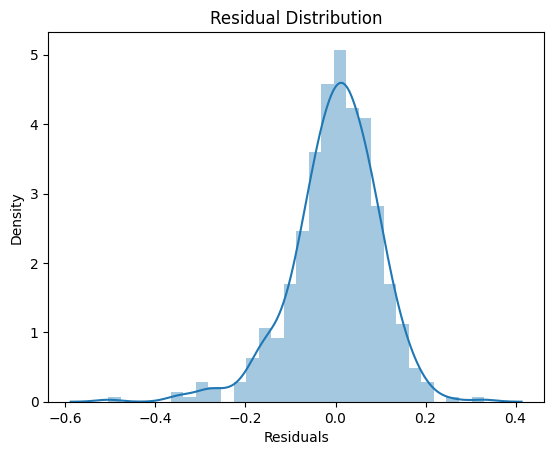

In [62]:

sns.distplot(res)
plt.xlabel('Residuals')
plt.title('Residual Distribution')
plt.show()



> As expected, the residuals are centered around 0



##### Randomness of errors (Homescedasticity)

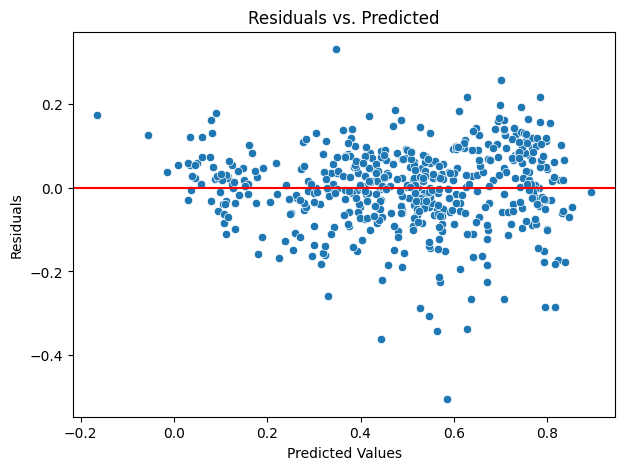

In [63]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_train_pred, y=res)
plt.axhline(0, color="red")  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()



> There is no specific pattern for the residuals and are randonly distributed



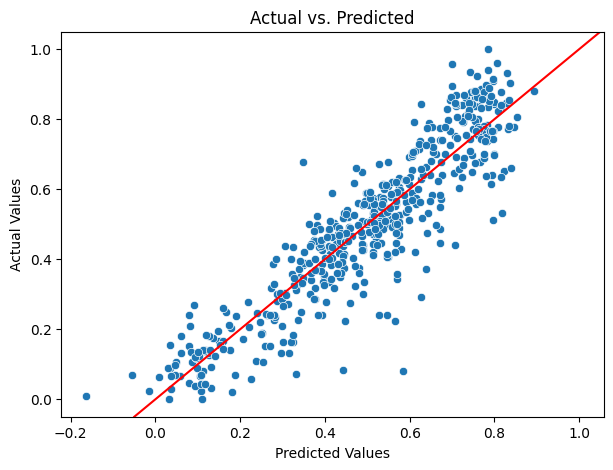

In [64]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs. Predicted")
plt.axline([0, 0], [1, 1], color="red")
plt.show()



> The residuals are randomly spread



## Predictions and evaluation on test set

In [65]:
## We have already transformed the data set along with MinMax Scaler for train set
bb_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light SnoRain,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.454545,0.031818,0.672727,0.526557,0.498148,0.435018,0.480125,0.281818,0.236364,0.231818,...,0.063636,0.131818,0.140909,0.163636,0.159091,0.113636,0.163636,0.654545,0.027273,0.318182
std,0.499065,0.175916,0.470288,0.229808,0.206260,0.212390,0.232713,0.450911,0.425817,0.422956,...,0.244661,0.339064,0.348721,0.370789,0.366595,0.318093,0.370789,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.047675,-0.092496,0.060760,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.351133,0.281540,0.287849,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.505733,0.470622,0.414837,0.472957,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.725609,0.640817,0.533519,0.639291,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,1.002908,1.214955,0.980804,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
bb_test.shape

(220, 30)

In [67]:
y_test = bb_test['cnt']
X_test = bb_test.drop('cnt',axis=1)
X_test = X_test[X_train_rfe5.columns]

In [68]:
X_test_sm = sm.add_constant(X_test)

In [69]:
X_test_sm.head()

,const,yr,holiday,temp,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weathersit_Clear,weathersit_Light SnoRain
468,1.0,1,0,0.543115,0,0,0,0,0,0,0,1,0
148,1.0,0,0,0.758058,0,0,0,0,0,0,0,1,0
302,1.0,0,0,0.324018,0,1,0,0,0,0,0,1,0
355,1.0,0,0,0.453814,1,0,1,0,0,0,0,0,0
515,1.0,1,0,0.773634,0,0,0,0,0,0,0,1,0


In [70]:
X_test_sm.shape

(220, 13)

In [71]:
model5.params

,0
const,0.109513
yr,0.241300
holiday,-0.070506
temp,0.431925
season_spring,-0.157460
season_winter,0.094924
mnth_Dec,-0.060008
mnth_Jul,-0.050772
mnth_Mar,0.057341
mnth_Nov,-0.084334


In [72]:
#predict
y_test_pred = model5.predict(X_test_sm)
equation = "Y = " + " + ".join([f"({coef:.4f} * {col})" for col, coef in model5.params.items()])
print(equation)


Y = (0.1095 * const) + (0.2413 * yr) + (-0.0705 * holiday) + (0.4319 * temp) + (-0.1575 * season_spring) + (0.0949 * season_winter) + (-0.0600 * mnth_Dec) + (-0.0508 * mnth_Jul) + (0.0573 * mnth_Mar) + (-0.0843 * mnth_Nov) + (0.0520 * mnth_Sep) + (0.0856 * weathersit_Clear) + (-0.2015 * weathersit_Light SnoRain)


In [73]:
#Evaluate
r2_score =  r2_score(y_test, y_test_pred)
print("R^2:", r2_score)

R^2: 0.8085806756964998


## Conclusion

> The R^2 score on the test data is 0.809 which is close the R^2 on the trained data (0.82). This indicates there is no overfitting.



> We can see the equation of the best fit line is:
`Y = (0.1095 * const) + (0.2413 * yr) + (-0.0705 * holiday) + (0.4319 * temp) + (-0.1575 * season_spring) + (0.0949 * season_winter) + (-0.0600 * mnth_Dec) + (-0.0508 * mnth_Jul) + (0.0573 * mnth_Mar) + (-0.0843 * mnth_Nov) + (0.0520 * mnth_Sep) + (0.0856 * weathersit_Clear) + (-0.2015 * weathersit_Light SnoRain)`





**Take aways**
1. Yearly Growth: Rentals are increasing over time (yr is strongly positive).
2. Weather is Crucial: Clear days see more rentals, while bad weather (rain/snow) significantly reduces usage.
3. Seasonal Trends: Spring sees lower rentals, while winter has relatively more rentals.
4. Holidays Reduce Rentals: Fewer people rent bikes on holidays.
5. Temperature Matters: Warmer temperatures strongly increase rentals.